In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sb
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline
sb.set_style('whitegrid')

In [134]:
## Cargamos el dataset
dataset = pd.read_csv("dataset-prueba2.csv")
tamaño=64
dataset[:10]

,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
5,-12.0,-5.0,-1.0,4.0,-16.0,-17.0,-69.0,-16.0,-12.0,-3.0,...,1.0,-36.0,-10.0,-12.0,-16.0,-12.0,-47.0,6.0,-30.0,0
6,43.0,0.0,-2.0,6.0,11.0,26.0,51.0,27.0,-9.0,-2.0,...,41.0,15.0,4.0,10.0,25.0,9.0,13.0,73.0,47.0,0
7,-26.0,-9.0,-18.0,-60.0,-23.0,-35.0,-85.0,-40.0,27.0,10.0,...,-17.0,-7.0,-1.0,2.0,10.0,-6.0,7.0,-2.0,-1.0,0
8,-34.0,3.0,9.0,29.0,6.0,-25.0,-124.0,-1.0,12.0,-6.0,...,-6.0,41.0,0.0,-10.0,-17.0,21.0,3.0,42.0,11.0,0
9,-1.0,0.0,6.0,37.0,21.0,22.0,-15.0,-36.0,-10.0,-3.0,...,-73.0,33.0,14.0,11.0,7.0,26.0,60.0,127.0,105.0,0


In [135]:
#faltan datos?
dataset.isnull().sum()  #no

26.0       0
4.0        0
5.0        0
8.0        0
-1.0       0
-13.0      0
-109.0     0
-66.0      0
-9.0       0
2.0        0
4.0.1      0
13.0       0
-18.0      0
-30.0      0
-119.0     0
-45.0      0
17.0       0
6.0        0
-1.0.1     0
-9.0.1     0
27.0       0
20.0       0
91.0       0
71.0       0
-26.0      0
-1.0.2     0
0.0        0
1.0        0
13.0.1     0
20.0.1     0
          ..
0.0.1      0
-23.0      0
-1.0.3     0
-80.0      0
4.0.2      0
-7.0       0
-6.0       0
-12.0      0
-27.0      0
-11.0      0
-16.0      0
-67.0      0
-8.0       0
-27.0.1    0
1.0.1      0
1.0.2      0
13.0.2     0
-8.0.1     0
-11.0.1    0
21.0       0
-28.0      0
61.0       0
4.0.3      0
8.0.1      0
5.0.1      0
4.0.4      0
-7.0.1     0
-59.0      0
16.0       0
0          0
Length: 65, dtype: int64

In [136]:
#no posee variables dummy

In [137]:
print("features")
X = dataset.ix[:,0:64].values
print(X)
y = dataset.ix[:,64].values
print("predecir")
print(y)




features
[[-47.  -6.  -5. ...  21. 111.  15.]
 [-19.  -8.  -8. ...  21. 114.  48.]
 [  2.   3.   0. ...  39. 119.  43.]
 ...
 [-13.   3.  -4. ...  -9.  -4.  22.]
 [  8. -24. -11. ...  -5.  -2.   7.]
 [ -8. -81.  -6. ... -25.  -4. -12.]]
predecir
[0 0 0 ... 2 2 2]


/home/laboratorio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/laboratorio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


In [139]:
#Aprendizaje logistica
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#Aprendizaje  arbol de desicion
from sklearn.model_selection import train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#random forest
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=15)
clf2 = clf2.fit(X_train, y_train)

/home/laboratorio/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/laboratorio/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [140]:
#Predicciones
y_pred = LogReg.predict(X_test) #logistica
y_pred2 = clf.predict(X_test) #arbol
y_pred3 = clf2.predict(X_test)#randomforest

In [141]:
#Evaluación del rendimiento del clasificador log
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[404, 230, 256],
       [124, 361, 371],
       [212, 305, 364]])

In [142]:
#Evaluación del rendimiento del clasificador arbol
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
print(confusion_matrix2)

[[801  16  73]
 [  9 751  96]
 [ 59  85 737]]


In [143]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
print(confusion_matrix3)

[[874   3  13]
 [  3 812  41]
 [ 27  28 826]]


In [144]:
print(classification_report(y_test, y_pred))#logistica

              precision    recall  f1-score   support

           0       0.55      0.45      0.50       890
           1       0.40      0.42      0.41       856
           2       0.37      0.41      0.39       881

    accuracy                           0.43      2627
   macro avg       0.44      0.43      0.43      2627
weighted avg       0.44      0.43      0.43      2627



In [145]:
print(classification_report(y_test, y_pred2))#arbol

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       890
           1       0.88      0.88      0.88       856
           2       0.81      0.84      0.82       881

    accuracy                           0.87      2627
   macro avg       0.87      0.87      0.87      2627
weighted avg       0.87      0.87      0.87      2627



In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       890
           1       0.96      0.95      0.96       856
           2       0.94      0.94      0.94       881

    accuracy                           0.96      2627
   macro avg       0.96      0.96      0.96      2627
weighted avg       0.96      0.96      0.96      2627



In [160]:
#predicciones
sumy=0
sum0=0
sum1=0
sum2=0
for i in y_pred:
        sumy=sumy+y_pred[i]
        #f y_pred[i]==0:
        #   sum0=sumy[i]
        #f y_pred[i]==1:
            sum1=umy[i]
        if y_pred[i]==2:
            sum2=umy[i]
print(sumy)

NameError: name 'sum1sumy' is not defined

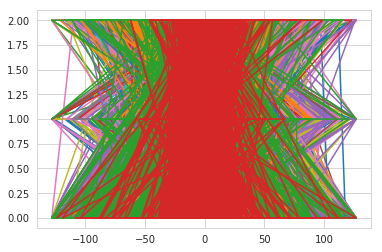

In [149]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X_test,y_pred)

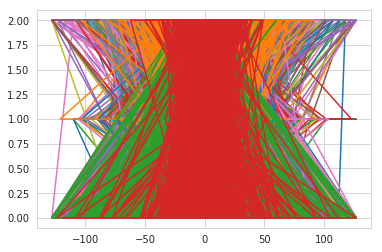

In [151]:
plt.plot(X_test,y_pred2)

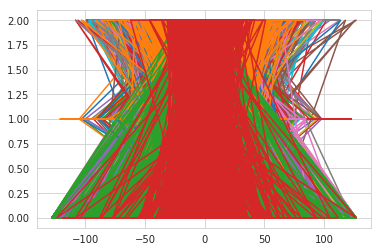

In [152]:
plt.plot(X_test,y_pred3)

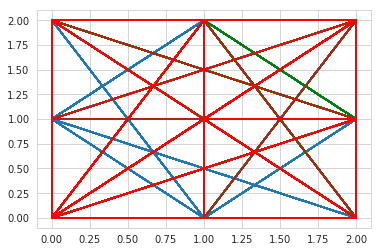

In [77]:
plt.plot(y_test,y_pred)
plt.plot(y_test,y_pred2,"g")
plt.plot(y_test,y_pred3,"r")